c:\Users\co279\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


RMSE: 0.6142837262568638
MAE: 0.46190018058690707
MAPE: 0.12112516852896095
R2: 0.7750488491715313
      Actual  Predicted
3151    7.40    7.07660
3152    5.06    4.56980
3153    3.22    3.27584
3154    3.63    3.73558
3155    7.04    6.67034
...      ...        ...
3589    3.81    3.83696
3590    5.72    5.79442
3591    5.81    5.08884
3592    9.00    7.29176
3593    4.84    4.74058

[443 rows x 2 columns]
                   Feature  Importance
4              slg_percent    0.637242
5          on_base_percent    0.165990
3               bb_percent    0.012584
1                   p_game    0.007989
2                k_percent    0.007453
15            edge_percent    0.006802
14         in_zone_percent    0.006801
19        f_strike_percent    0.006699
21      linedrives_percent    0.006445
20        flyballs_percent    0.006443
8                   p_loss    0.006239
18             batted_ball    0.006108
16           whiff_percent    0.005928
12  meatball_swing_percent    0.005788
17  

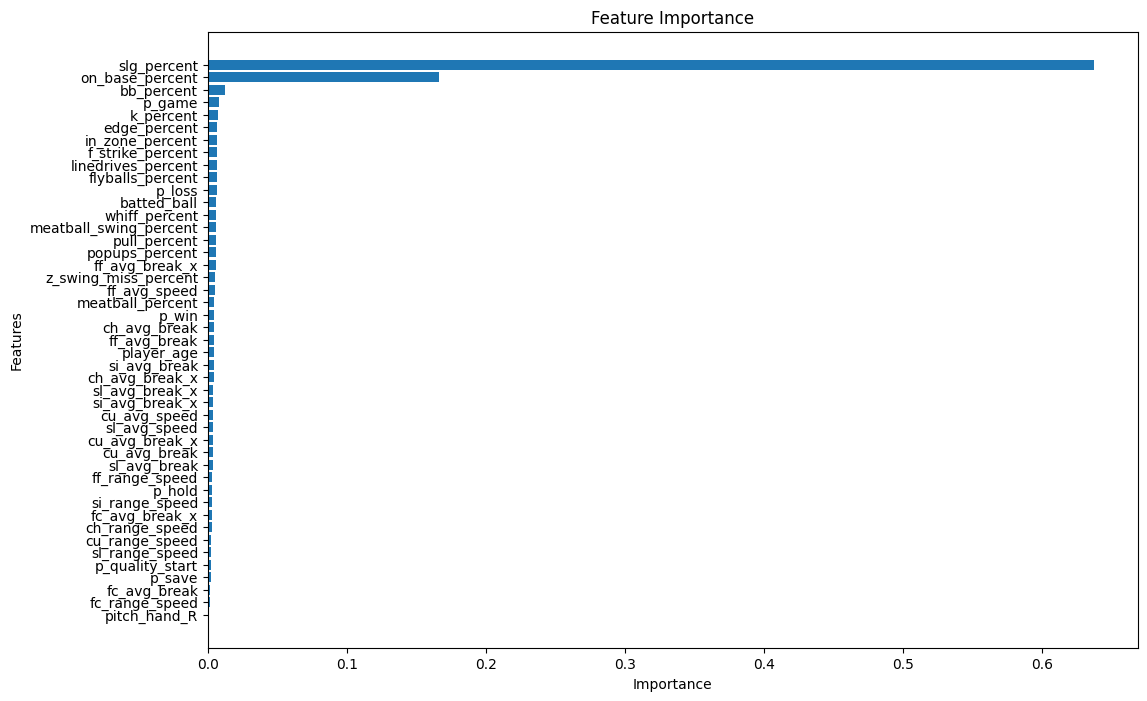

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# 데이터셋 불러오기
file_path = 'C:\\Users\\co279\\mp_statcast.csv'
data = pd.read_csv(file_path)

# 필요 없는 컬럼 제거
data = data.drop(columns=['last_name, first_name', 'player_id'])

# 결측치 처리 (예: 평균값으로 대체)
data = data.fillna(0)

if 'pitch_hand' in data:
    data = pd.get_dummies(data, columns=['pitch_hand'], drop_first=True)
    
# 학습 데이터와 테스트 데이터 분리
train_data = data[data['year'] != 2023]
test_data = data[data['year'] == 2023]

# 독립변수와 종속변수 분리
X_train = train_data.drop(columns=['p_era', 'year'])
y_train = train_data['p_era']
X_test = test_data.drop(columns=['p_era', 'year'])
y_test = test_data['p_era']

# 모델 정의
model = RandomForestRegressor(n_estimators=500, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

mape = mean_absolute_percentage_error(y_test, y_pred)
print(f"MAPE: {mape}")

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2}')

# 실제 값과 예측 값 비교
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# 비교 결과 출력
print(comparison)

feature_importances = model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

# 피처 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [30]:
# 출력 옵션 설정
pd.set_option('display.max_rows', None)

# comparison1 = comparison[comparison['Actual']<=3]
# # print(comparison)
# comparison1['diff'] = comparison1['Actual'] - comparison1['Predicted']
# print(comparison1.sort_values(by='Actual'))
# print(comparison1['Actual'].mean())
# print(comparison1['Predicted'].mean())

print(y_test)

3151    7.40
3152    5.06
3153    3.22
3154    3.63
3155    7.04
3156    5.41
3157    3.64
3158    4.56
3159    3.77
3160    1.05
3161    6.02
3162    5.73
3163    6.80
3164    4.07
3165    2.46
3166    3.14
3167    3.28
3168    3.21
3169    3.57
3170    4.73
3171    3.03
3172    3.87
3173    5.42
3174    4.56
3175    4.66
3176    3.02
3177    4.91
3178    3.34
3179    3.29
3180    3.26
3181    2.56
3182    3.58
3183    4.30
3184    4.40
3185    4.12
3186    4.45
3187    4.40
3188    6.41
3189    5.31
3190    5.43
3191    1.38
3192    2.63
3193    2.81
3194    4.88
3195    3.63
3196    2.79
3197    5.53
3198    3.74
3199    6.28
3200    3.28
3201    4.73
3202    4.30
3203    4.14
3204    4.28
3205    4.18
3206    3.46
3207    3.09
3208    2.80
3209    5.36
3210    4.09
3211    3.61
3212    6.45
3213    5.45
3214    5.20
3215    4.20
3216    4.76
3217    4.15
3218    5.12
3219    3.60
3220    6.10
3221    3.86
3222    4.78
3223    1.71
3224    1.82
3225    4.50
3226    3.98
3227    4.02